In [1]:
# The constants from mc-badness.py
Base = 8
Dimensions = 6

In [2]:
from math import floor, log

In [3]:
# Read the values for badness of error from the file produced by mc-badness.py.
# Calculate the level of the error and add it to the list 'badnesses'.

badnesses = []

with open('badness_2021-07-09') as f:
   for line in f:
      l = line.split()
      if len(l) >= 4 and l[3] == "wrong":
         badness = float(l[4])
         if badness == 0.0:
            degree = 0
         else:
            degree = floor(log(badness)/log(Base))
         level = Dimensions - degree - 1
         badnesses.append(level)

array([[<AxesSubplot:title={'center':'Error Level'}>]], dtype=object)

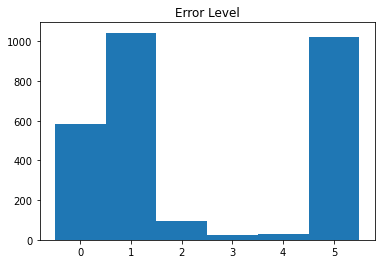

In [4]:
# Display a histogram of the error levels.
from pandas import DataFrame

# Apply a continuity correction to the range
r = [x - 1/2 for x in (0, Dimensions)]

df = DataFrame(badnesses)
df.columns = ['Error Level']
df.hist(bins=Dimensions, grid=False, range=r)

In [5]:
# Level 0: Parse errors in the encoding
# Level 1: Difference of the surface form with the true surface form
# Level 2: Ungrammatical morpheme type combinations
# Level 3: Unparadigmatic morphemes
# Level 4: Difference in number of analytical words with the true form
# Level 5: Difference in morphemes with the true form